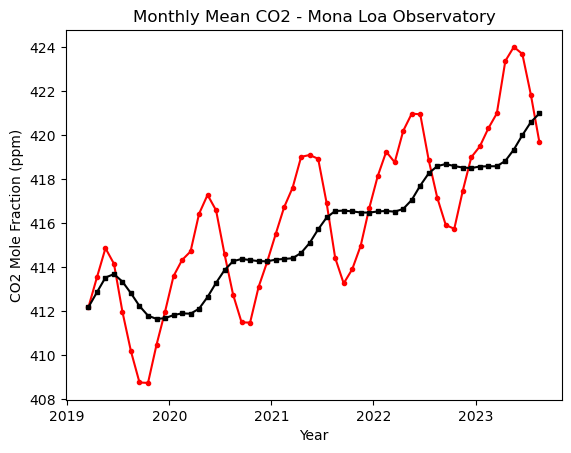

In [48]:
# Monthly Mean CO2 Data
# Chat GPT: How to plot loaded csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
co2_data = "Data\co2_mm_mlo.csv"
df = pd.read_csv(co2_data, comment = '#')

# Chat GPT: How to plot last data entries
plt.plot(df["decimal date"].tail(54), df["average"].tail(54), color = 'r', marker = 'o', markersize = 3)

# Chat GPT: Plot a seasonal correction
seasonal_frequency = 10
rolling_mean = df["average"].tail(54).rolling(window = seasonal_frequency, min_periods = 1).mean()
plt.plot(df["decimal date"].tail(54), rolling_mean, color = "black", marker = "s", markersize = 3)

plt.xlabel("Year")
plt.ylabel("CO2 Mole Fraction (ppm)")
plt.title("Monthly Mean CO2 - Mona Loa Observatory")
plt.show()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
nfdb = "Data\NFDB_point_stats.csv"
data = pd.read_csv(nfdb)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 530: invalid start byte